In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

# Introduction to Machine Learning

During this lecture you will be introduced to the concept of Machine Learning (ML). You may have heard this term before, and in reality you have been doing some form of ML throughout your course already. The essential idea is that out of past experience from data, you are able to get some for of model to learn over time, and be useful for something like predicting the future. We shall explore this idea of ML by starting off with a very simple technique. 

# Linear Regression

<b>Linear regression</b> is a basic predictive analytics technique that uses historical data to predict an output variable. It is popular for predictive modelling because it is easily understood and can be explained using plain English.

Linear regression models have many real-world applications in an array of industries such as economics (e.g. predicting growth), business (e.g. predicting product sales, employee performance), social science (e.g. predicting political leanings from gender or race), healthcare (e.g. predicting blood pressure levels from weight, disease onset from biological factors), and more.

Understanding how to implement linear regression models can unearth stories in data to solve important problems. We will use Python as it is a robust tool to handle, process, and model data. It has an array of packages for linear regression modelling.

The basic idea is that if we can fit a linear regression model to observed data, we can then use the model to predict any future values. For example, let’s assume that we have found from historical data that the price (P) of a house is linearly dependent upon its size (S) — in fact, we found that a house’s price is exactly 90 times its size. The equation will look like this:

\begin{equation}
P = 90*S
\end{equation}

With this model, we can then predict the cost of any house. If we have a house that is 1,500 square metres, we can calculate its price to be: $P = 90*1500 = 135,000$.

## Basic Concepts and Mathematics
Let us go over some terminology related to variables in a linear regression model. A lot of these terms are common across other ML techniques, so try to understand the problem at two levels: one specific to the mechanics of linear regression as a technique, and another to the general idea of what we expect ML to do for us.

There are two kinds of variables in a linear regression model:
* The input or <b>predictor</b> variable is the variable(s) that help predict the value of the output variable. It is commonly referred to as $X$.
* The output variable, or <b>predictee</b> is the variable that we want to predict. It is commonly referred to as $Y$.

To estimate $Y$ using linear regression, we assume the equation:
\begin{equation}
Y_{e} = \alpha + \beta X
\end{equation}

$Y_{e}$ is the estimated, or predicted value of $Y$. Indeed, in most cases in ML, we will never get to an exact value of what the true value of $Y$ would be. The models we use are usually simplifications of reality which can give us very good <b>approximate</b> predictions which we can work with, but which will have some acceptable difference compared to the true value. This is a central tenet of machine learning, referred to as Probably Approximately Correct Learning, or PAC-Learning, for short.

### PAC-Learning

In computer science, PAC-learning is a framework for the formal analysis of machine learning. In this framework, a learner receives past samples and must select some kind of generalization function to fit the samples. This is done in similar fashion to the general principles of the scientific method we know so well and love. The generalization function that a learner suggests is a <b>hypothesis</b>, from a certain selection of possible functions. The goal is that, with high probability (P), the selected function will have low generalization error, and can well approximate (A) past data as well as future unseen data. The learner (L) must be able to learn the concept provided what is an acceptable approximation and probability of success in the future given the samples available. Of course, PAC-Learning implies that some future predictions, and indeed past samples, will not always 'fit' the model. The data itself may not fit the 'real' model if the data itself is noisy. We are OK with that.


## Ordinary Least Squares

Going back to our problem, the goal is to find statistically significant values of the parameters $\alpha$ and $\beta$ that minimise the difference between $Y$ and $Y_{e}$. If we are able to determine the optimum values of these two parameters, then we will have the line of best fit that we can use to predict the values of $Y$, given the value of $X$. So, how do we estimate $\alpha$ and $\beta$? We can use a method called ordinary least squares.

Let us consider a sample dataset:

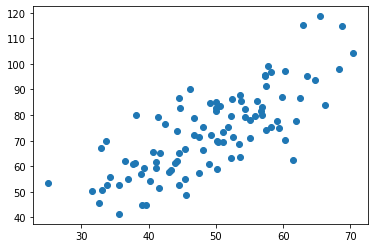

In [2]:
# Preprocessing Input data
data = pd.read_csv('./data/ml_lr_data.csv')
X = np.array(data.iloc[:, 0].tolist()).reshape(-1, 1)
Y = np.array(data.iloc[:, 1].tolist()).reshape(-1, 1)
plt.scatter(X, Y)
plt.show()

The concept of least squares is to find a particular straight line (linear) that somewhat follows the pattern of the data. Of course, no single line can pass over all the data points here. But it is reasonable to assume that there is a general linear trend in the data, and some lines would be a better fit than others. The better fit will be determined by finding values of $\alpha$ and $\beta$ that minimise the sum of the squared difference between $Y$ (true data) and $Y_{e}$ (where the model predicts the output values to be). We will not go through the derivation here, but using calculus we can show that the values of the unknown parameters are as follows:

\begin{equation}
\beta = \frac{\sum_{i=1}^{n}(x_i - \mu_X)(y_i - \mu_Y)}{\sum_{i=1}^{n}(x_i - \mu_X)^2}
\end{equation}

\begin{equation}
\alpha = \mu_{Y} - \beta * \mu_{X}
\end{equation}

Some of the terms here should look familiar following from the last lecture. You should recognize $\beta$ as simply Cov(X,Y)/Var(X)...

Let us put all of this into code:

In [3]:
# Building the model
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
    
beta = num / den
alpha = Y_mean - beta*X_mean

print (alpha, beta)

[9.90860619] [1.28735737]


Now that we have found the values of $\alpha$ and $\beta$, we have achieved our model:

\begin{equation}
Y_{e} = 9.9086 + 1.2874X
\end{equation}

What this means is from the data, we can see how predictions will be made by the model, for the range of values of $X$ that were given to us in the data set:

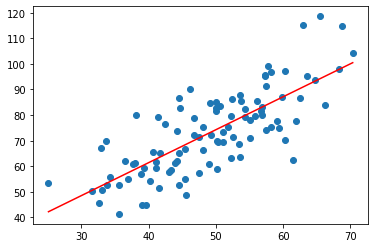

In [4]:
# Making predictions
Y_pred = beta*X + alpha

plt.scatter(X, Y) # actual
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

Clearly, not all values of $Y$ fall on the straight line that has been fitted to the data. Our model gives us $Y_e$, which is not the same as $Y$. However, we can be sure that no other straight line will fit this data better. We can use this model to keep making future predictions of $Y$ for new/unseen values of $X$.

# Linear Regression with scikit-learn

The Python language has a number of tools to help you apply many hypothesis functions to your data, saving you implementation time. It is always recommended to know and understand the actual function or model you are using, but beyond that, your code will invariably look and perform better when using standard Python packages for many machine learning problems. The single, most useful package that you will want to make use of is the scikit-learn package,

We shall start by discussing how to implement ordinary least squares, but the form and style of using this model will be very similar to all other models in the package. We shall use the same dataset as above.

In [5]:
data = pd.read_csv('./data/ml_lr_data.csv')
X = np.array(data.iloc[:, 0].tolist()).reshape(-1, 1)
Y = np.array(data.iloc[:, 1].tolist()).reshape(-1, 1)

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, Y)

And that is it! There is no need to calculate the values for $\alpha$ and $\beta$ as we did earlier. If we want to know what the values for $\alpha$ and $\beta$ are, we can access them from the model that was created:

In [6]:
print(f'alpha = {model.intercept_}')
print(f'beta = {model.coef_}')

alpha = [9.90860619]
beta = [[1.28735737]]


Similarly, now that we have found the values of $\alpha$ and $\beta$, we have achieved our model:

\begin{equation}
Y_{e} = 9.9086 + 1.2874X
\end{equation}

Given a model, we can also make predictions using the '.predict()' method of the model, like so:

In [7]:
new_X = [[60.5],
         [30.4]]
model.predict(new_X)

array([[87.79372708],
       [49.04427024]])

## Multivariate Regression

You will notice how the input shape for $X$ is a list of lists. Each sample is a list in itself. The reason for this is that the package extentends linear regression to have multiple predictors (or <b>features</b>) per sample. For example, we may want to predict the body mass index (BMI) of a person based on their height and weight. We have multiple predictors (heigh and weight) per sample (person).

Therefore, the general model for linear regression in scikit-learn is as follows:
\begin{equation}
Y_{e} = \alpha + \beta_{1}X_{1} + \beta_{2}X_{2} + \ldots + \beta_{p}X_{p}
\end{equation}
where $p$ is the number of predictors.

# Some Fun

Let us look at an application of regression to astrophysics. We will focus on the relation between the redshifts of supernovas and their luminosity distance (i.e. a cosmological parametrization of the expansion of the universe). To accomplish this, we shall be utilising a dataset which contains a generated set of synthetic supernova data assuming a cosmological model given by:

\begin{equation}
\mu(z)=-5 \log _{10}\left((1+z) \frac{c}{H_{0}} \int \frac{d z}{\left(\Omega_{m}(1+z)^{3}+\Omega_{\Lambda}\right)^{1 / 2}}\right)
\end{equation}

In this model, $\mu(z)$ is the distance modulus to the supernova, $H_{0}$ is the Hubble constant, $\Omega_{m}$ is the cosmological matter density and $\Omega_{\Lambda}$ is the energy density from a cosmological constant. For our fiducial cosmology, we choose $\Omega_{m}=0.3$, $\Omega_{\Lambda}=0.7$ and $H_{0}=70 \text{km s}^{-1} \text{Mpc}^{-1}$, and add heteroscedastic Gaussian noise that increases linearly with redshift.

The resulting $\mu(z)$ cannot be expressed as a sum of simple close-form analytic functions, including low-order polynomials. This example addresses many of the challgnes we face when working with observational data sets: we do not know the intrinsic complexity of the model (e.g. the form of dark energy), the dependent variables can have heteroscedastic uncertainties, there can be missing or incomplete data, and the dependent variables can be correlated. For the majority of this course and the techniques we describe, we will often assume the uncertainties in the independent variables are small. In real-world applications we do not get to make this choice as the observations themselves define the distribution in uncertainties irrespective of the models we assume. For the supernova data, an example of such a case would be if we estimated the supernova redshifts using broadband photometry (i.e. photometric redhifts). For now though, we will consider this toy model dataset.

Let us import a set of 100 simulated supernovas.

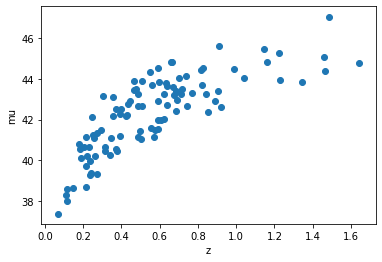

In [8]:
data = np.load('./data/lec2b_regression_gen.npz')
z_sample = data['z_sample'].reshape(-1, 1)
mu_sample = data['mu_sample'].reshape(-1, 1)
dmu = data['dmu']

plt.scatter(z_sample,mu_sample)
plt.xlabel('z')
plt.ylabel('mu')
plt.show()

Now let us try fit a linear regression model to the data, and plot the prediction line.

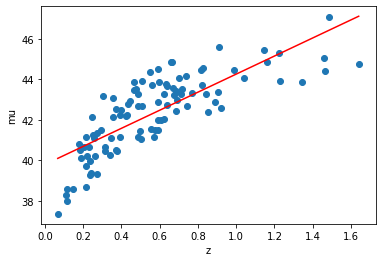

In [9]:
# Initialise and fit model
lm = LinearRegression()
model = lm.fit(z_sample, mu_sample)

# make model predictions
mu_pred = model.predict(z_sample)

plt.scatter(z_sample,mu_sample)
plt.xlabel('z')
plt.ylabel('mu')
plt.plot([min(z_sample), max(z_sample)], [min(mu_pred), max(mu_pred)], color='red') # predicted
plt.show()

As befre, the linear model provides a sensible straight-line regression through the data. It would be interesting to quantify the error between the model and the actual data. We will do this by comparing our predictions, based on the linear regression model and the actual values we should have obtained i.e. we shall be comparing 'mu_pred' with 'mu_sample'.

We can use a standard metric for model performance e.g. R2 score. Skelearn model predictions can be compared to the truth values to return the coefficient of determination $R^2$ of the prediction. The coefficient $R^2$ is defined as ($1 - u/v$), where $u$ is the residual sum of squares ((y_true - y_pred) ** 2).sum() and $v$ is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$ score of 0.0.

In [10]:
print(r2_score(mu_sample, mu_pred))

0.6226538704476176


A better model would probably do a lot better than this. The linear regression model does not capture the structure within the data at the high and low redshift limits - the model does not have sufficient flexibility to reproduce the correlation displayed by the data. We shall demonstrate this by introducing a nonlinear, polynomial regression of some degree e.g. 4-th degree polynomial to the same datset.

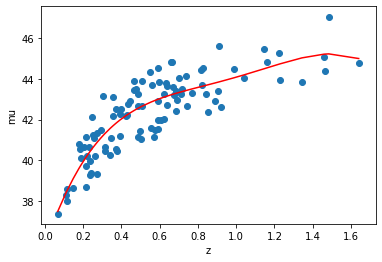

In [11]:
p_model = PolynomialFeatures(degree=4)
z_sample_poly = p_model.fit_transform(z_sample)

lm2 = LinearRegression()
lm2.fit(z_sample_poly, mu_sample)

# make model predictons
mu_poly_pred = lm2.predict(z_sample_poly)

plt.scatter(z_sample,mu_sample)
plt.xlabel('z')
plt.ylabel('mu')

# sort z_sample values in ascending order,
# corrobarating the same order in mu_poly_pred
z_sample_ordered, mu_poly_pred_ordered = 
    zip(*sorted(zip(z_sample, mu_poly_pred)))
plt.plot(z_sample_ordered,
         mu_poly_pred_ordered,
         color='red')
plt.show()

The regression curve now gives a fit that is closer to the non-linear correlation of the original data. We can determine the $R^2$ score for this polynomial regression as well:

In [12]:
print(r2_score(mu_sample, mu_poly_pred))

0.7567099238640891


As you can observe, the score is better for a polynomial fit than it is for linear regression - which was exptected. These scores show how one model is better than another, and will allow you to compare and pick appropriate models for your data.

# Conclusion
This concludes the brief introduction to machine learning. Besides all the useful stuff you learned today, we can finally summarize what Machine Learning refers to. The various models available e.g. linear regression, polynomial regression, etc. are the 'Machine'. Learning is the tuning of the parameters of a model to fit a dataset, so Machine Learning! Over time, you will acquire knowledge of many more types of machines (some much more exotic than what we covered today), and over time you will be able to determine a possible list of appropriate machines that would be capable of PAC-learning for a specific problem.